In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


pd.options.display.max_columns = 90
print(pd.options.display.max_rows)  

def printAllUniqueValuesFromAllColumns(): 
    for column in df.columns:
        print(column)
        print(df[str(column)].unique())
        print("________________________________________________")
        

def convertToNumericValues():
    #Convertion to numeric values
    for column in df.columns:
        if not any(substring in column for substring in ("ID", "IP", "Timestamp", "Label")):
            df[column] = pd.to_numeric(df[column])
            
def showHistograms():
    #Histograms
    for column in df.columns:
        if not any(substring in column for substring in ("ID", "IP", "Timestamp")):
            if any(substring in column for substring in ("Packet", "Flow")):
                df[column] = df[column][df[column] < 1000]
            print(column)
            plt.hist(df[column], bins = 100)
            plt.show()
            
def printAllColumns(df):
    # all columns
    for col in df.columns:
        print(col)
        
def printColumnsTypes(df):
    for type1 in df.dtypes:
        print(type1)
        
def calculateDataContinuousness(df):
    sorted_timestamps = df["Timestamp"].sort_values()
    df["Timestamp"] = pd.to_datetime(df["Timestamp"]) 
    # Make sure that the converted value is correct
    df["Timestamp"].dtype
    # Make sure that the converted value is correct
    df["Timestamp"].dtype
    first_timestamp = sorted_timestamps.iloc[0].to_pydatetime()
    last_timestamp = sorted_timestamps.iloc[-1].to_pydatetime()

    # Decided to go week by week as per-day resolution resulted in unreadable plots
    dataset_span_weeks = (last_timestamp - first_timestamp).days//7
    dataset_span_weeks
    plt.hist(df["Timestamp"], bins = dataset_span_weeks)
    plt.legend(["Liczba pomiarów w danym tygodniu"])
    plt.title("Ciągłość danych")
    plt.show()

def deleteColumnsWithOneUniqueValue():
    # deleting not important columns ( with one unique value)
    df.drop(columns = ['Active Mean', 'Active Std', 'Active Max', 'Active Min'])

def calculateAndShowAbsoluteCorrelationWithAllColumns(df):
    corr = df.corr().abs()
    corr.style.background_gradient(cmap='coolwarm')
    
def showSmallestCorrelationBetweenAllColumns(df):
    df.corr().abs().unstack().sort_values().drop_duplicates()[0:10]
    

60


In [3]:
df = pd.read_csv("../Darknet.CSV")

# No idea why pandas does this, but row 141530 contains the column names
# and subsequent rows are the repeated data from the previous lines of dataset
# (row 141531 is row 0 and so forth). I'm trimming the DataFrame after loading to prevent conversion issues
df = df[:141530]

/tmp/ipykernel_3134/2798156721.py:1: DtypeWarning: Columns (2,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Darknet.CSV")


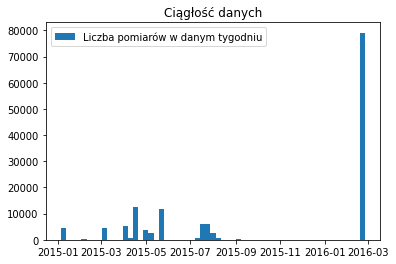

In [5]:
convertToNumericValues()
calculateDataContinuousness(df)

Src Port


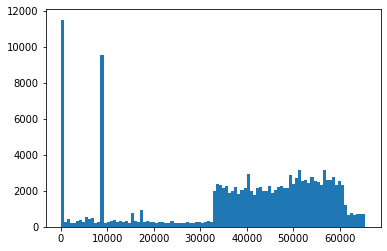

Dst Port


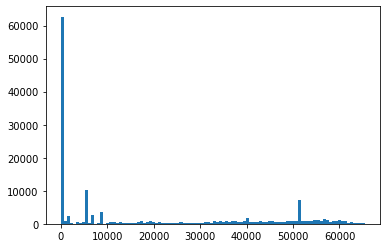

Protocol


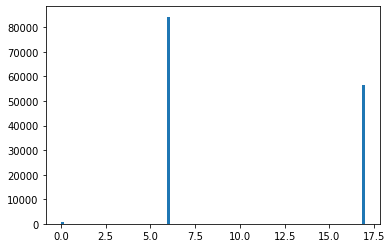

Flow Duration


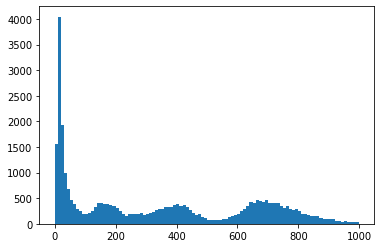

Total Fwd Packet


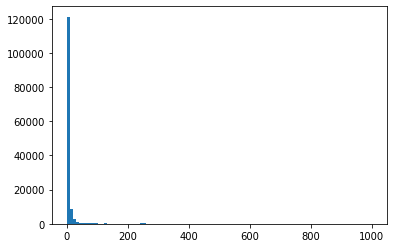

Total Bwd packets


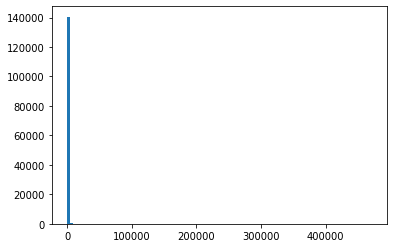

Total Length of Fwd Packet


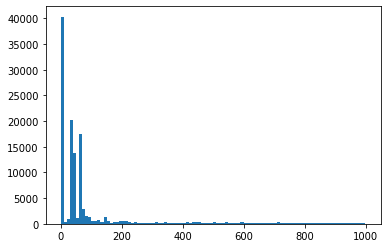

Total Length of Bwd Packet


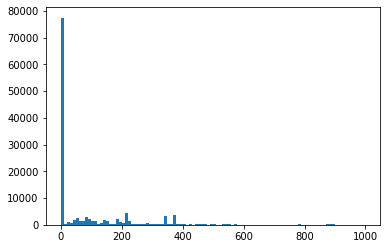

Fwd Packet Length Max


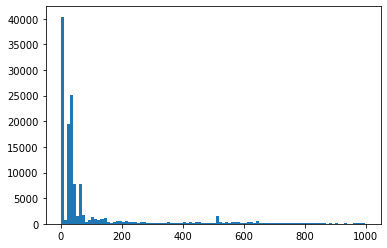

Fwd Packet Length Min


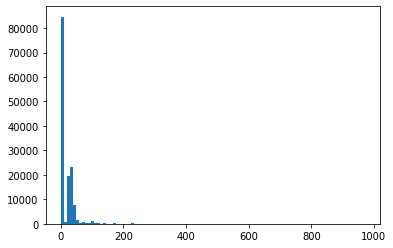

Fwd Packet Length Mean


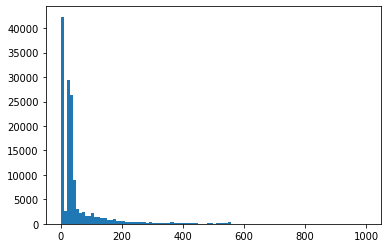

Fwd Packet Length Std


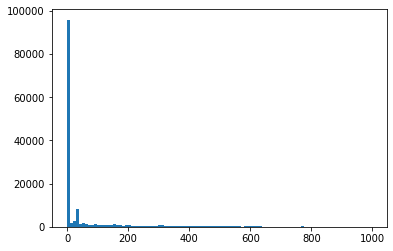

Bwd Packet Length Max


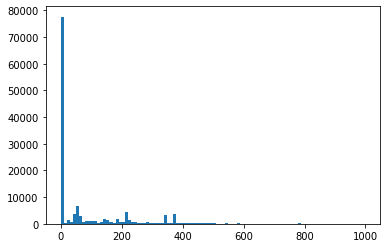

Bwd Packet Length Min


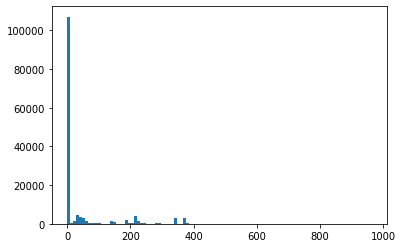

Bwd Packet Length Mean


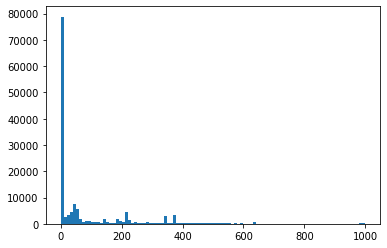

Bwd Packet Length Std


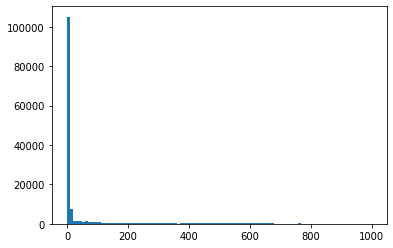

Flow Bytes/s


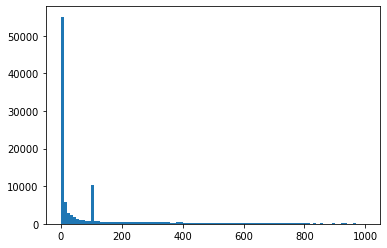

Flow Packets/s


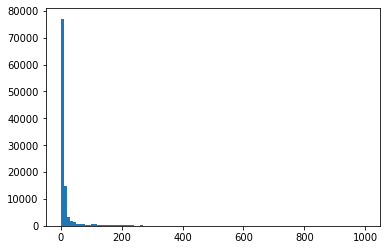

Flow IAT Mean


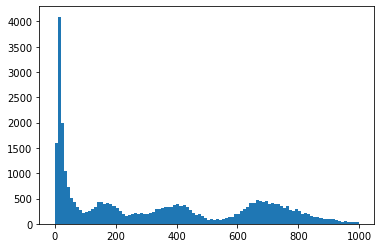

Flow IAT Std


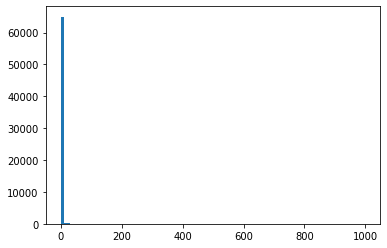

Flow IAT Max


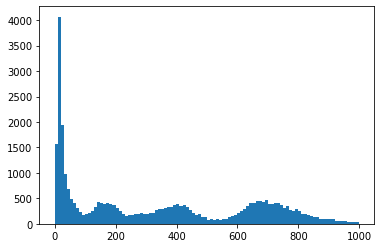

Flow IAT Min


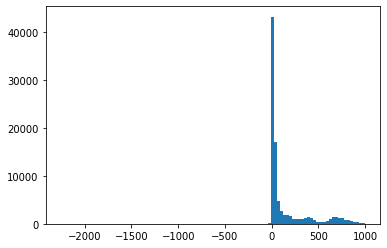

Fwd IAT Total


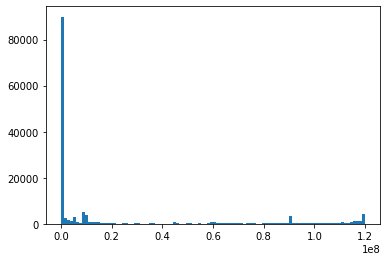

Fwd IAT Mean


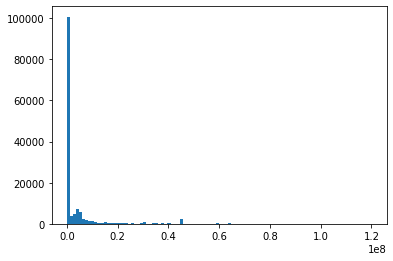

Fwd IAT Std


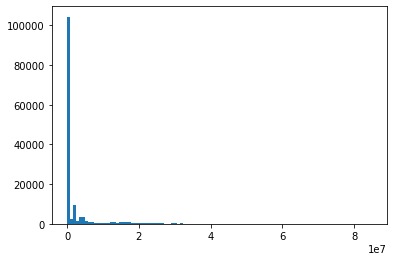

Fwd IAT Max


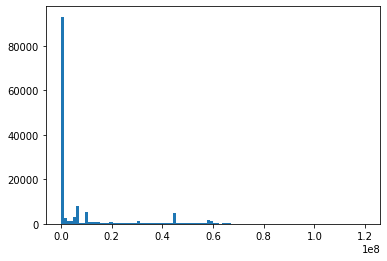

Fwd IAT Min


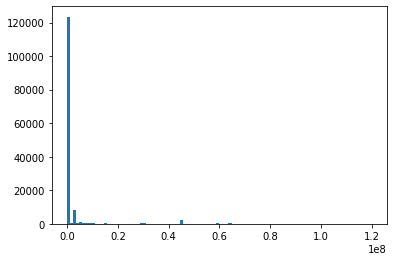

Bwd IAT Total


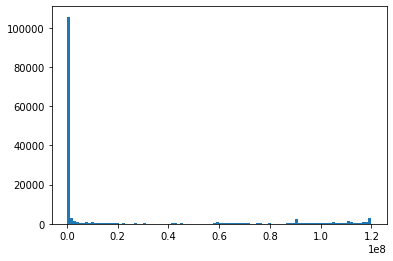

Bwd IAT Mean


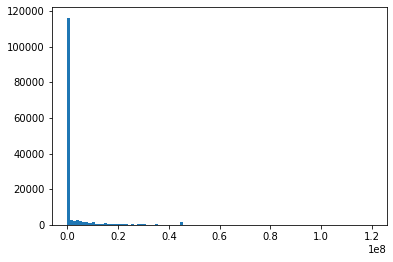

Bwd IAT Std


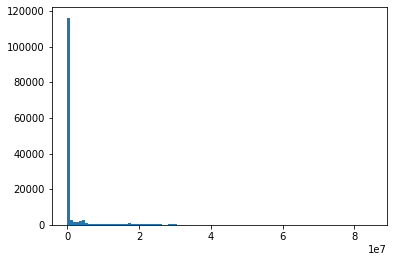

Bwd IAT Max


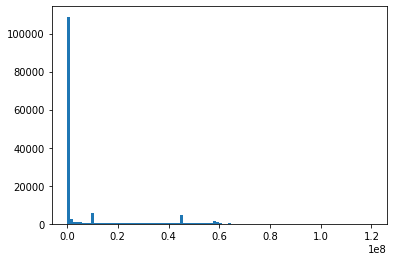

Bwd IAT Min


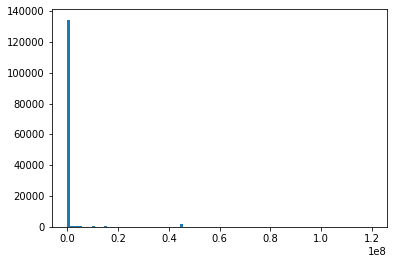

Fwd PSH Flags


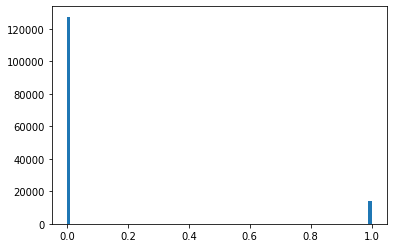

Bwd PSH Flags


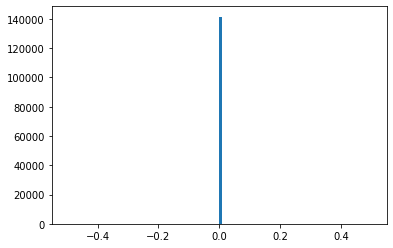

Fwd URG Flags


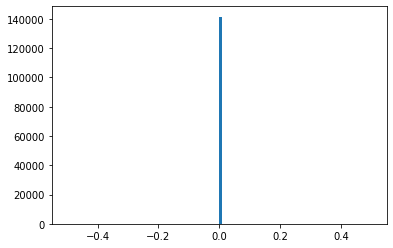

Bwd URG Flags


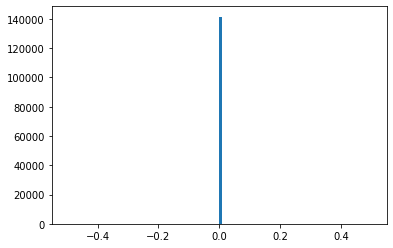

Fwd Header Length


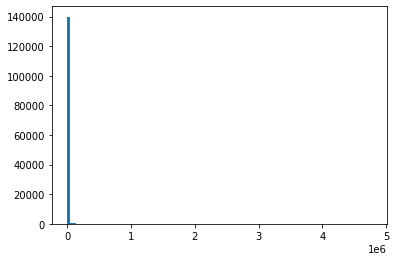

Bwd Header Length


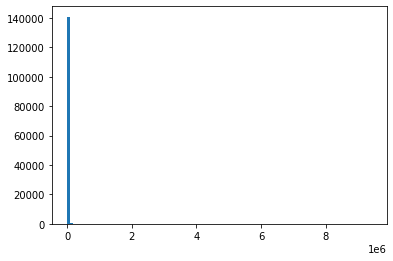

Fwd Packets/s


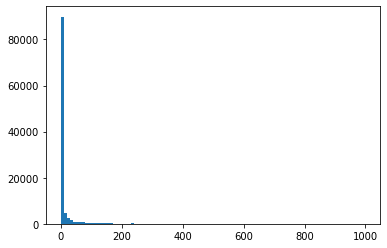

Bwd Packets/s


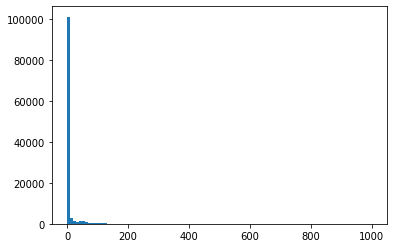

Packet Length Min


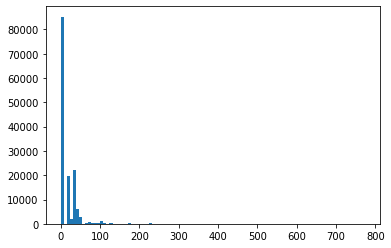

Packet Length Max


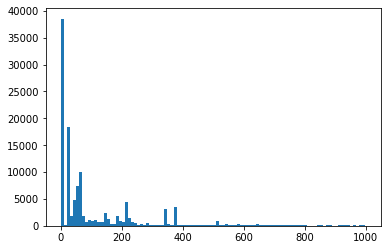

Packet Length Mean


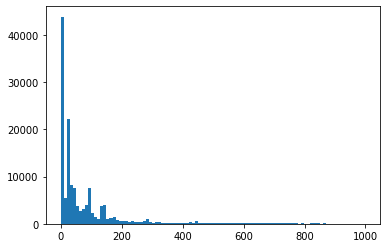

Packet Length Std


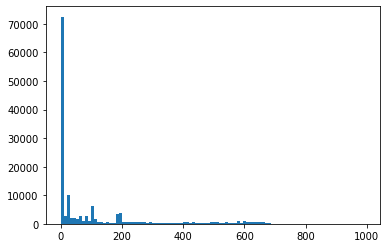

Packet Length Variance


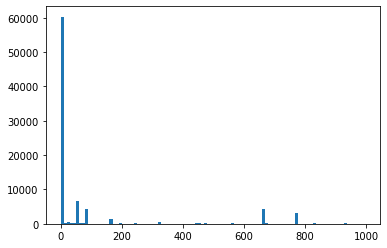

FIN Flag Count


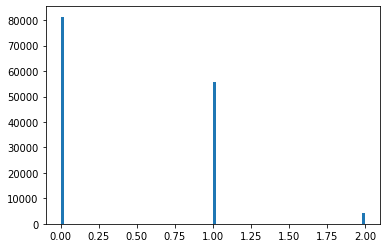

SYN Flag Count


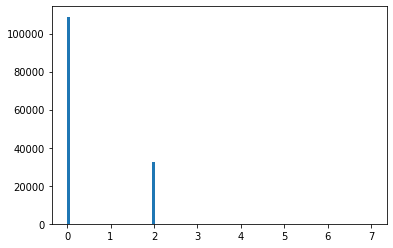

RST Flag Count


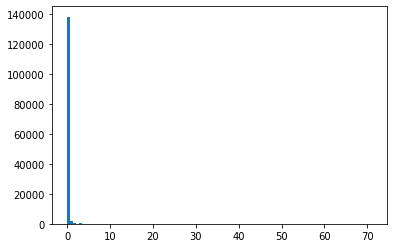

PSH Flag Count


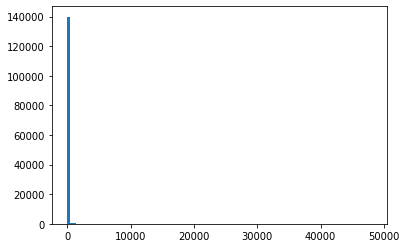

ACK Flag Count


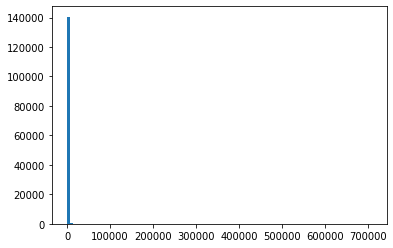

URG Flag Count


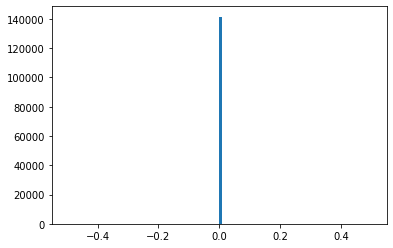

CWE Flag Count


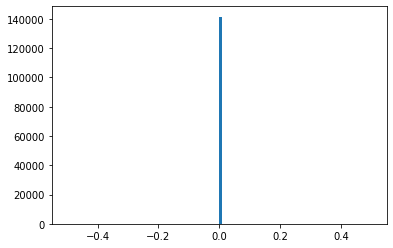

ECE Flag Count


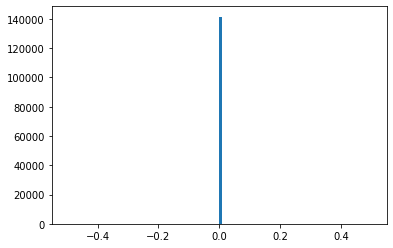

Down/Up Ratio


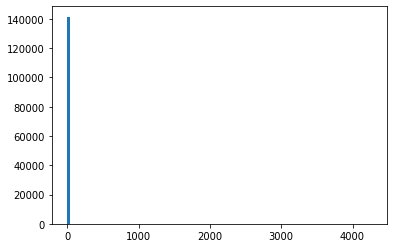

Average Packet Size


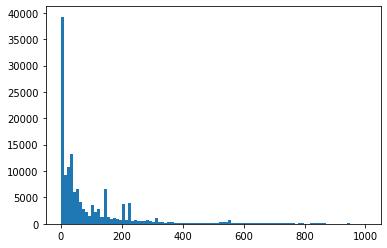

Fwd Segment Size Avg


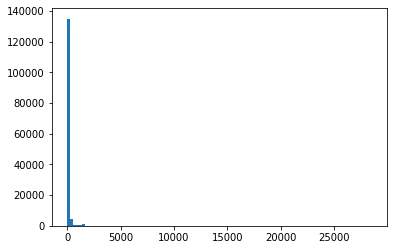

Bwd Segment Size Avg


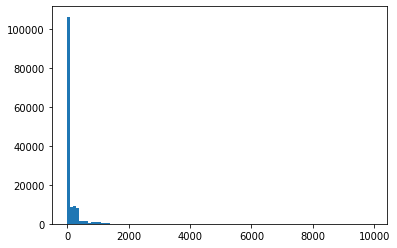

Fwd Bytes/Bulk Avg


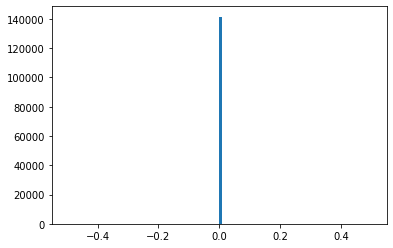

Fwd Packet/Bulk Avg


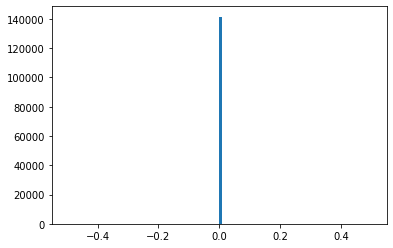

Fwd Bulk Rate Avg


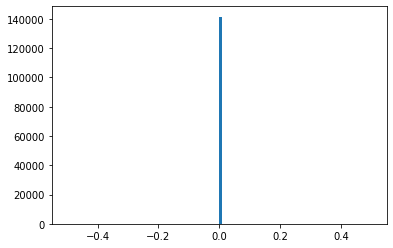

Bwd Bytes/Bulk Avg


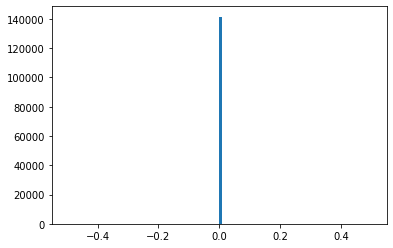

Bwd Packet/Bulk Avg


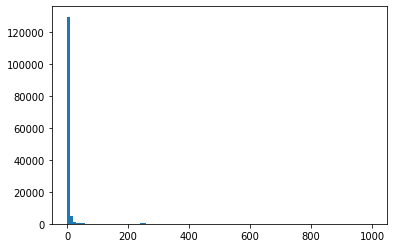

Bwd Bulk Rate Avg


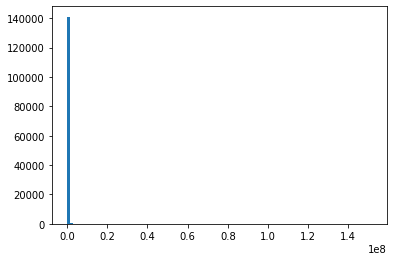

Subflow Fwd Packets


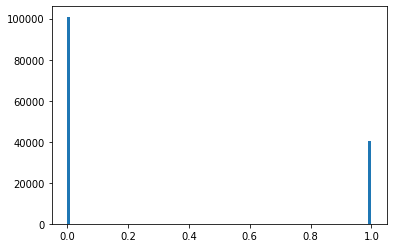

Subflow Fwd Bytes


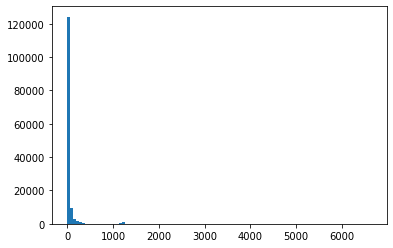

Subflow Bwd Packets


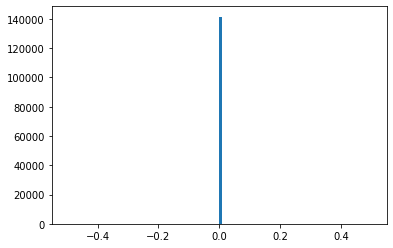

Subflow Bwd Bytes


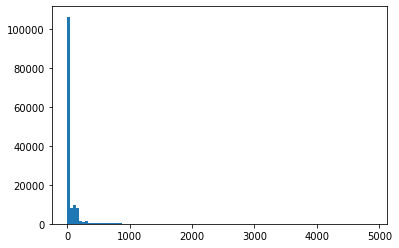

FWD Init Win Bytes


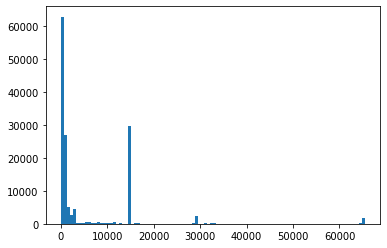

Bwd Init Win Bytes


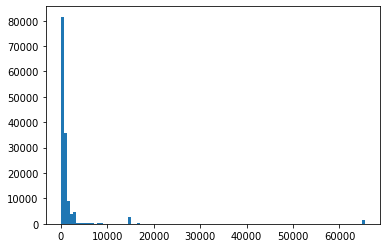

Fwd Act Data Pkts


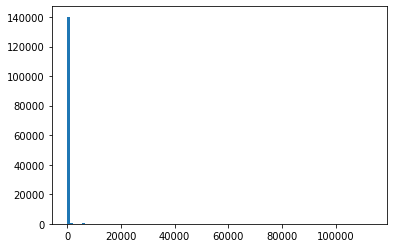

Fwd Seg Size Min


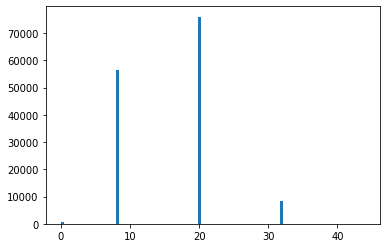

Active Mean


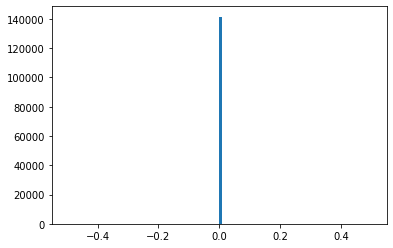

Active Std


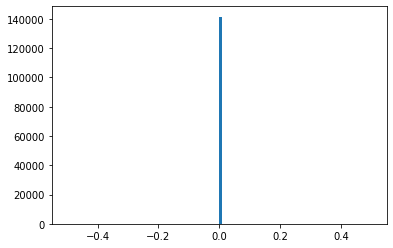

Active Max


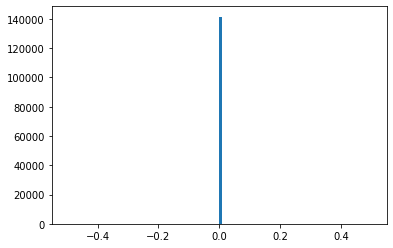

Active Min


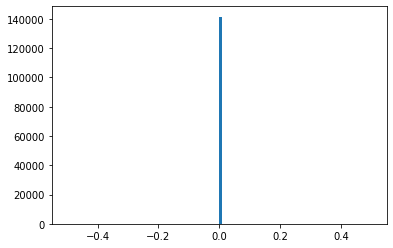

Idle Mean


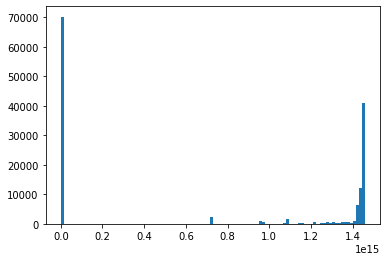

Idle Std


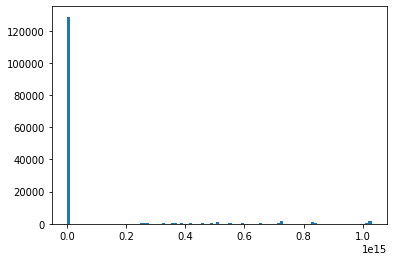

Idle Max


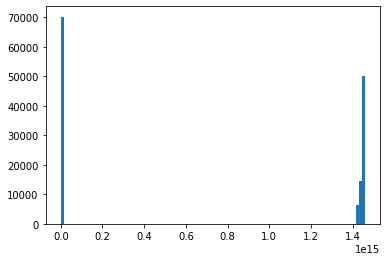

Idle Min


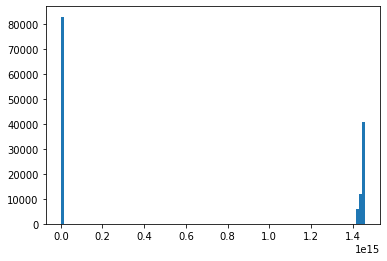

Label


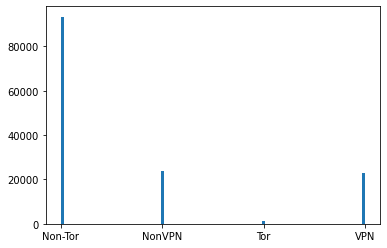

Label.1


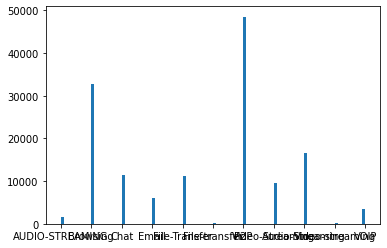

In [6]:
#printAllColumns(df)
showHistograms()
deleteColumnsWithOneUniqueValue()

In [7]:
calculateAndShowAbsoluteCorrelationWithAllColumns(df)

In [8]:
showSmallestCorrelationBetweenAllColumns(df)